In [ ]:
#rdms

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import torch
import torchvision 
import pandas as pd

In [ ]:
activation_layer = torch.load('/content/gdrive/MyDrive/BIA/models_layers/model_0/conv1.pth')


In [67]:
def show_activation_layer_rdm(activation_layer, model, layer_name):
    df = pd.DataFrame(activation_layer)

    corr = df.corr()
    rdm = 1-corr

    d = sn.heatmap(rdm, annot=True)
    d.set_title(layer_name)
    plt.savefig(model + "_" +layer_name + ".png")
    plt.show()

In [112]:
model = 'model_19'
layers = ['conv1', 'conv2']

for layer in layers:
  print(layer)
  activation_layer = torch.load('/content/gdrive/MyDrive/BIA/models_layers/'+model+'/'+layer+'.pth')
  print(activation_layer.size())
  activation_layer = activation_layer.permute(3,2,1,0)
  activ = np.asarray(activation_layer).squeeze()
  print(np.shape(activ))
  activ = activ.reshape(np.shape(activ)[0]*np.shape(activ)[1]*np.shape(activ)[2], 10)
  print(np.shape(activ))
  show_activation_layer_rdm(activ, model, layer)

conv1


FileNotFoundError: ignored

fc1
torch.Size([10, 1, 50])
(50, 10)
(50, 10)


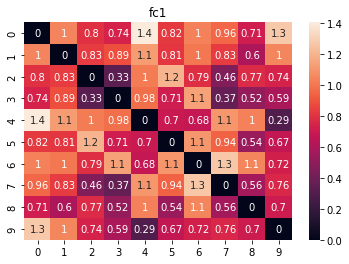

fc2
torch.Size([10, 1, 10])
(10, 10)
(10, 10)


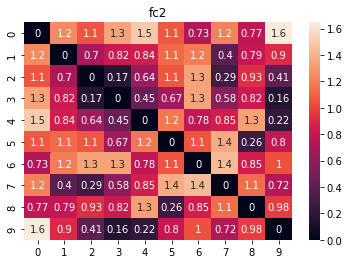

In [111]:
model = 'model_19'
layers = ['fc1', 'fc2']

for layer in layers:
  print(layer)
  activation_layer = torch.load('/content/gdrive/MyDrive/BIA/models_layers/'+model+'/'+layer+'.pth')
  print(activation_layer.size())
  activation_layer = activation_layer.permute(2,1,0)
  activ = np.asarray(activation_layer).squeeze()
  #activ = np.asarray(activation_layer).flatten()
  print(np.shape(activ))
  #activ = activ.reshape(10, np.shape(activ)[1]*np.shape(activ)[2]*np.shape(activ)[3])
  #activ = activ.flatten()
  print(np.shape(activ))
  #activ = activ.reshape(10,10)
  #print(np.shape(activ))
  show_activation_layer_rdm(activ, model, layer)